In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load all CSV files
data_dir = "SMAP_Sample"  # Change this to actual folder path
all_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith(".csv")]

def extract_lat_lon(filename):
    """Extract latitude and longitude from filename."""
    try:
        parts = os.path.basename(filename).replace(".csv","").split("_")  # Remove extension
        lat, lon = float(parts[1]), float(parts[2])  # Extract lat/lon
        return lat, lon
    except (ValueError, IndexError):
        return None, None

def load_data(files):
    dfs = []
    for file in files:
        df = pd.read_csv(file)  # Read Excel instead of CSV
        lat, lon = extract_lat_lon(file)
        if lat is not None and lon is not None:
            df["Latitude"] = lat
            df["Longitude"] = lon
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

# Load and preprocess data
data = load_data(all_files)
data.dropna(inplace=True)  # Handling missing values

# Feature and target selection
features = ["sm_surface", "sm_rootzone", "Latitude", "Longitude"]
targets = ["sm_surface_model", "sm_rootzone_model"]

# Case 1: First 4 years for training, last year for testing
train_data1 = data[data["Date"] < int("20200101")]
test_data1 = data[data["Date"] >= int("20200101")]

X_train1, y_train1 = train_data1[features], train_data1[targets]
X_test1, y_test1 = test_data1[features], test_data1[targets]

# Case 2: Random train-test split (80-20 split equivalent to 4 years)
train_data2, test_data2 = train_test_split(data, test_size=0.2, random_state=42)
X_train2, y_train2 = train_data2[features], train_data2[targets]
X_test2, y_test2 = test_data2[features], test_data2[targets]

# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train1, y_train1)
y_pred1 = rf.predict(X_test1)
rf.fit(X_train2, y_train2)
y_pred2 = rf.predict(X_test2)

# Evaluation metrics
def cal_r2(obs, pre):
    numerator = np.sum((obs - np.mean(obs)) * (pre - np.mean(pre)))
    denominator = np.sqrt(np.sum((obs - np.mean(obs)) ** 2) * np.sum((pre - np.mean(pre)) ** 2))
    return (numerator / denominator)**2

def cal_nse(obs, pre):
    numerator = np.sum((obs - pre)**2)
    denominator = np.sum((obs - np.mean(obs))**2)
    return 1 - (numerator / denominator)

def cal_mae(obs, pre):
    return np.mean(np.abs(obs - pre))

def cal_nrmse_by_range(obs, pre):
    rmse = np.sqrt(np.mean((obs - pre) ** 2))
    return rmse / (np.max(obs) - np.min(obs))

def cal_kge(obs, pre):
    r = np.corrcoef(obs, pre)[0, 1]
    alpha = np.std(pre) / np.std(obs)
    beta = np.mean(pre) / np.mean(obs)
    return 1 - np.sqrt((r - 1) ** 2 + (alpha - 1) ** 2 + (beta - 1) ** 2)

def cal_percent_bias(obs, pre):
    return (np.sum(pre - obs) / np.sum(obs)) * 100

def evaluate_model(y_true, y_pred):
    results = {}
    for i, col in enumerate(targets):
        obs, pre = y_true[col].values, y_pred[:, i]
        results[col] = {
            "R2": cal_r2(obs, pre),
            "NSE": cal_nse(obs, pre),
            "MAE": cal_mae(obs, pre),
            "nRMSE": cal_nrmse_by_range(obs, pre),
            "KGE": cal_kge(obs, pre),
            "%Bias": cal_percent_bias(obs, pre)
        }
    return results

# Evaluate both cases
results_case1 = evaluate_model(y_test1, y_pred1)
results_case2 = evaluate_model(y_test2, y_pred2)

print("Case 1 Evaluation:", results_case1)
print("Case 2 Evaluation:", results_case2)


Case 1 Evaluation: {'sm_surface_model': {'R2': np.float64(0.8884733525095931), 'NSE': np.float64(0.8815253319501407), 'MAE': np.float64(0.022443235735154624), 'nRMSE': np.float64(0.08662147533127422), 'KGE': np.float64(0.9316326285053982), '%Bias': np.float64(3.706034473390217)}, 'sm_rootzone_model': {'R2': np.float64(0.9622806592949665), 'NSE': np.float64(0.9619566890117052), 'MAE': np.float64(0.010505278972419683), 'nRMSE': np.float64(0.0437877337297569), 'KGE': np.float64(0.9795083263376028), '%Bias': np.float64(-0.4278348779791011)}}
Case 2 Evaluation: {'sm_surface_model': {'R2': np.float64(0.92567356114466), 'NSE': np.float64(0.9255176664938278), 'MAE': np.float64(0.014130718491052081), 'nRMSE': np.float64(0.0631324992889887), 'KGE': np.float64(0.953795490904759), '%Bias': np.float64(0.2974135967682138)}, 'sm_rootzone_model': {'R2': np.float64(0.9791803017341195), 'NSE': np.float64(0.9791403844331498), 'MAE': np.float64(0.006758992677443696), 'nRMSE': np.float64(0.0314954100858305

In [15]:
# Load all Excel files
data_dir = "SMAP_Sample"  # Change this to actual folder path
all_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith(".csv")]

print(f"Found {len(all_files)} files.")  # Debugging
if not all_files:
    raise FileNotFoundError("No Excel files found in the specified directory.")


Found 26 files.


C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


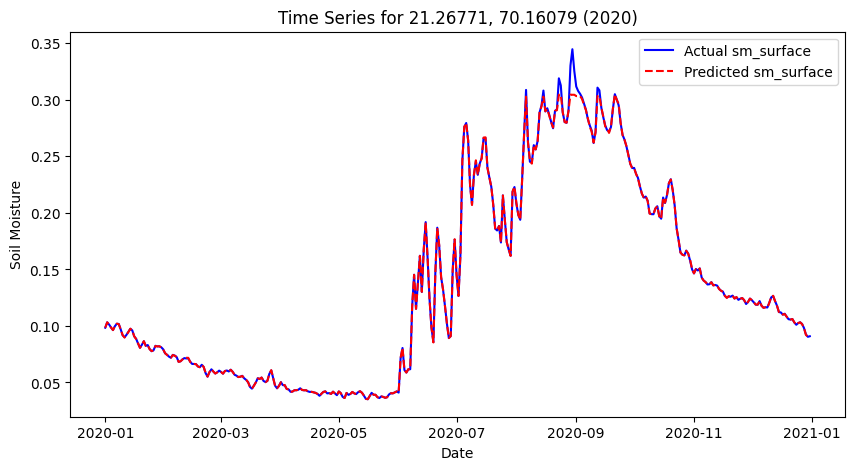

C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


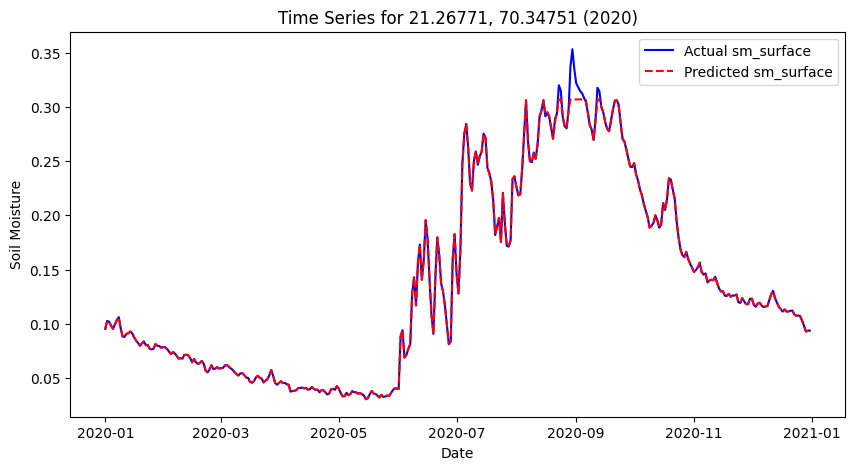

C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


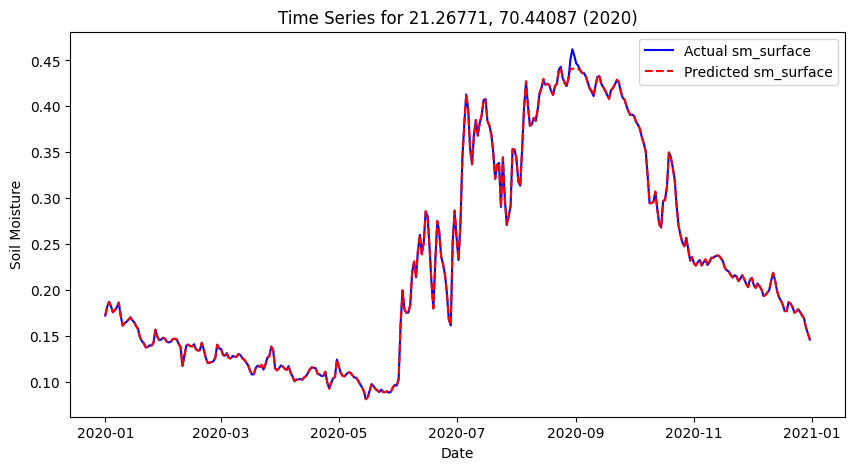

C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


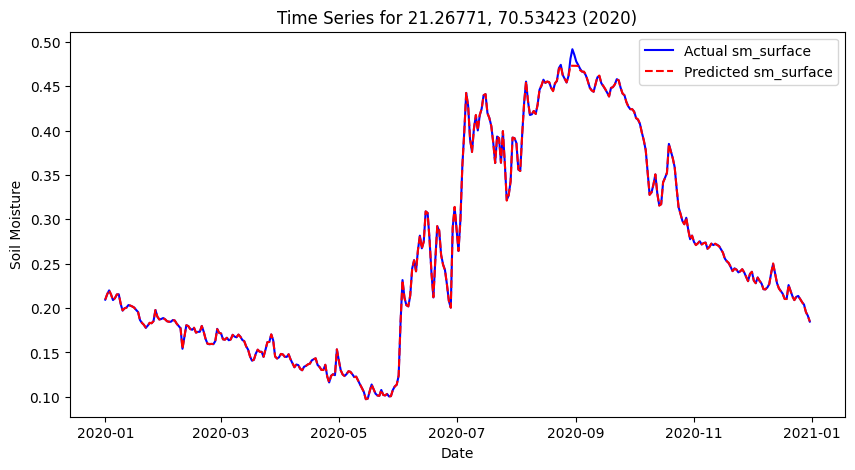

C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


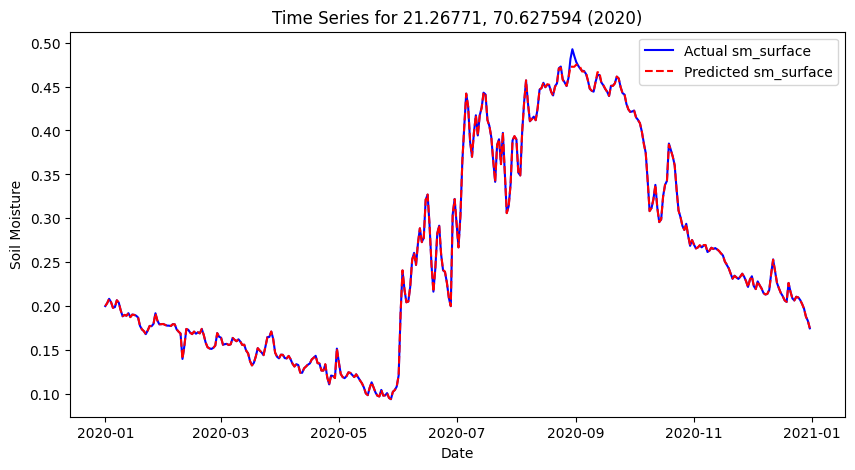

C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


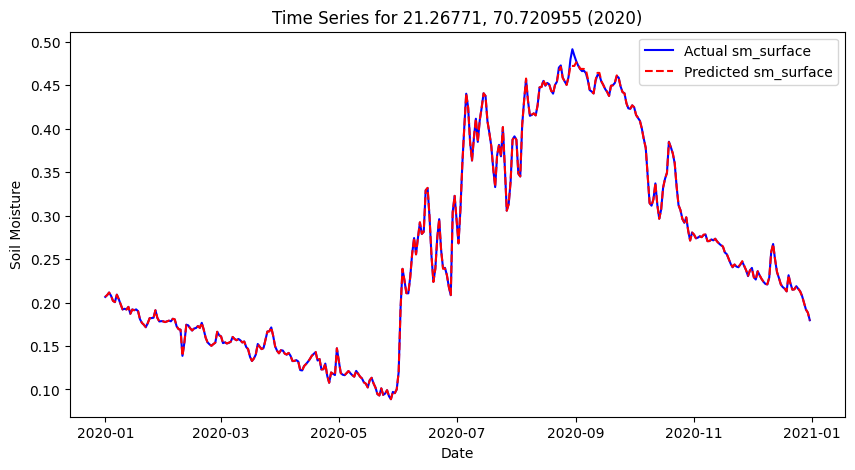

C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


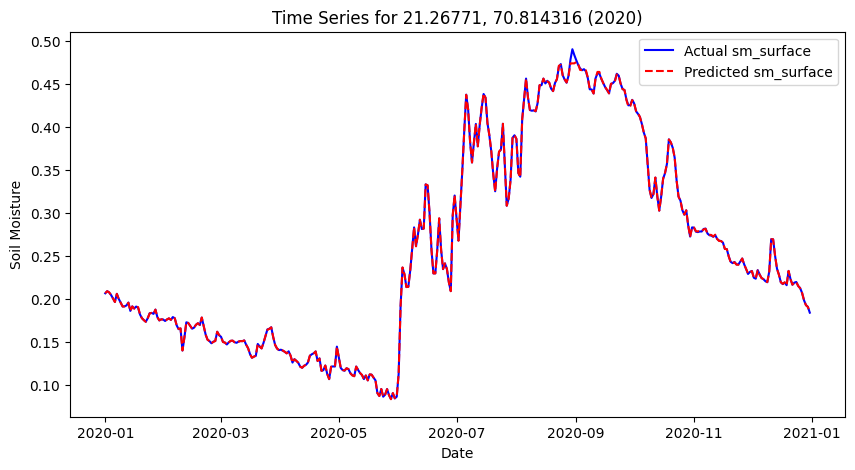

C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


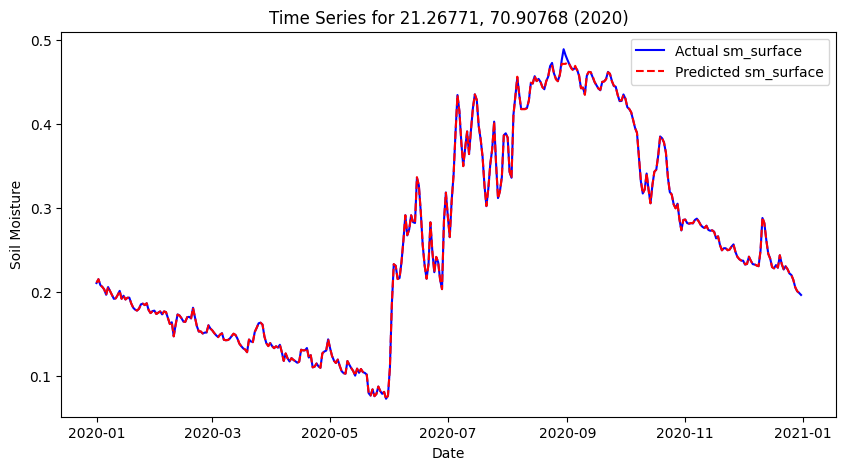

C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


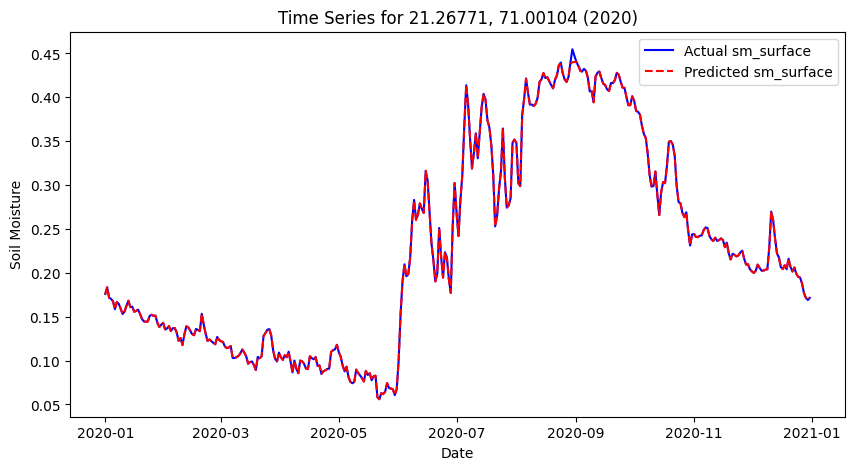

C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


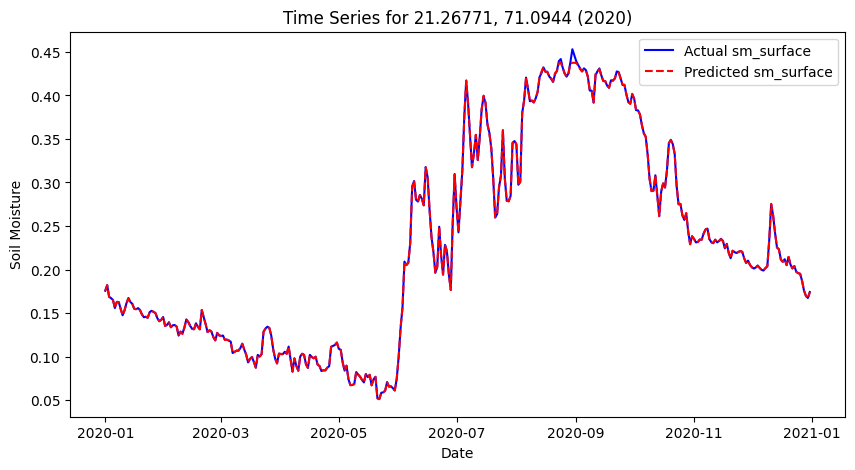

C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


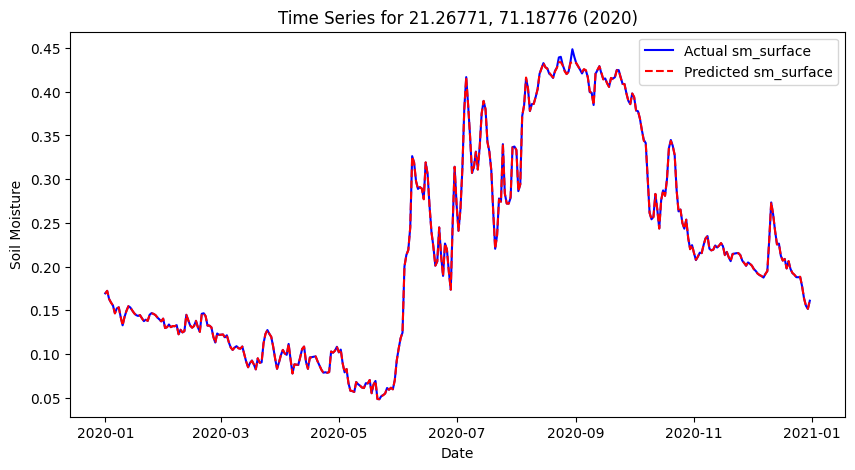

C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


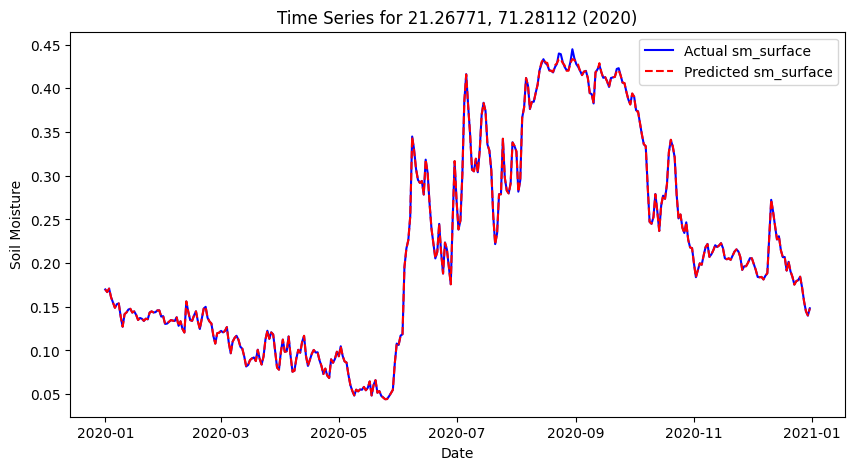

C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


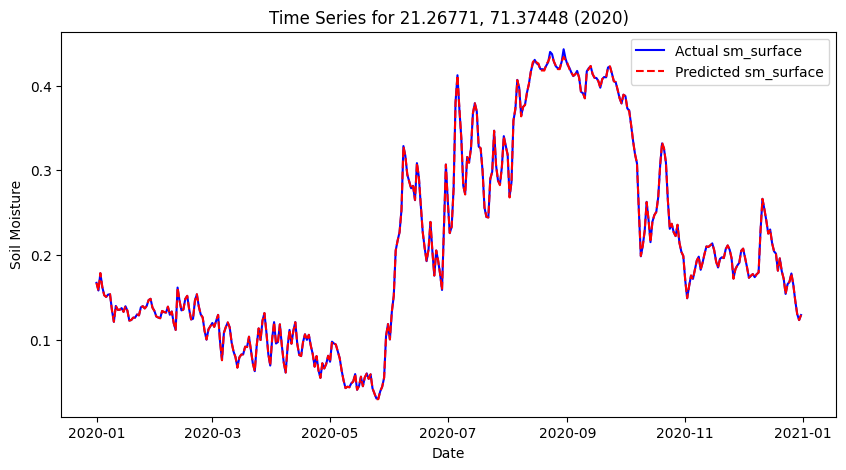

C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


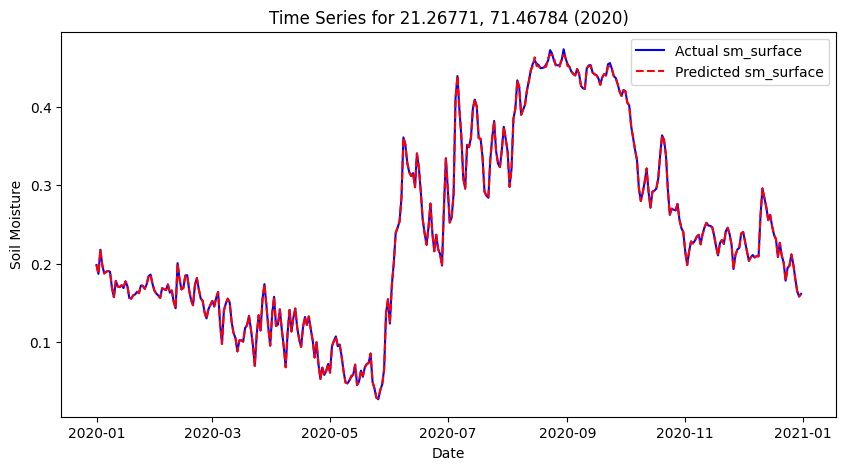

C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


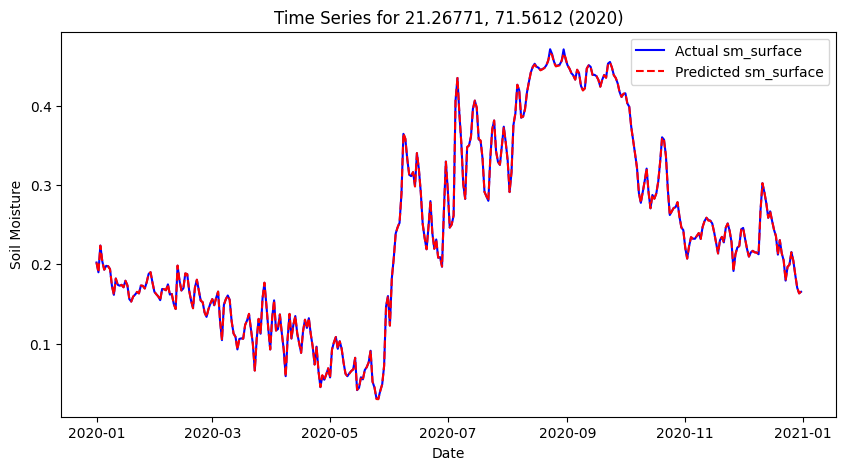

C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


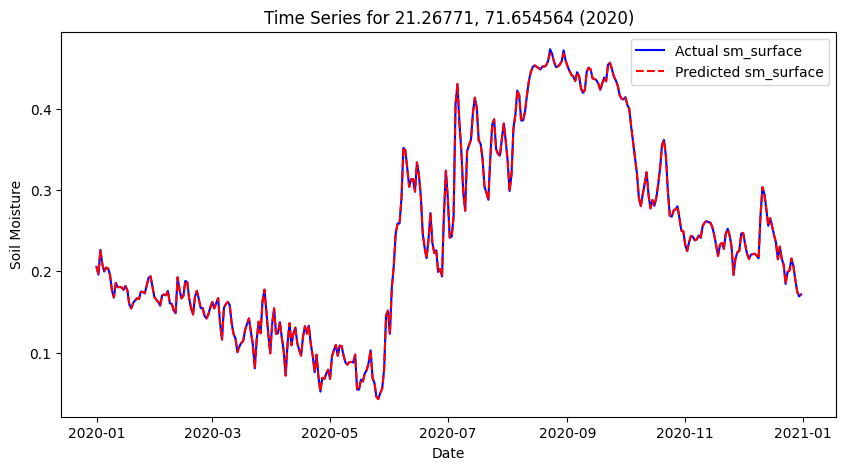

C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


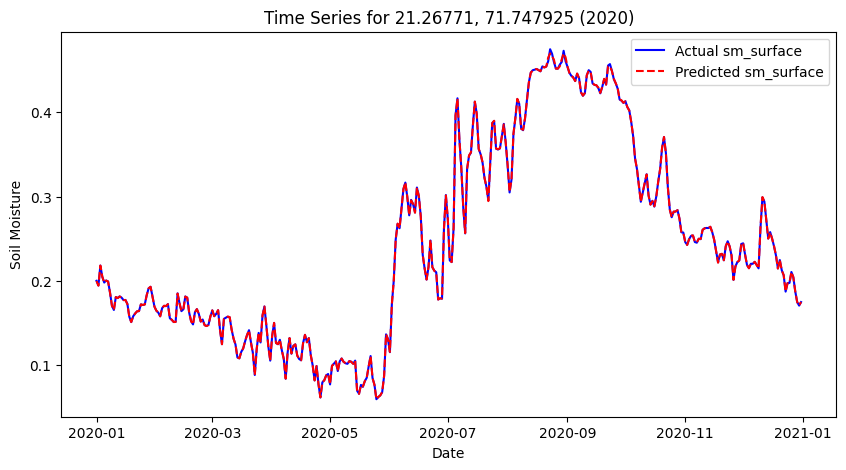

C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


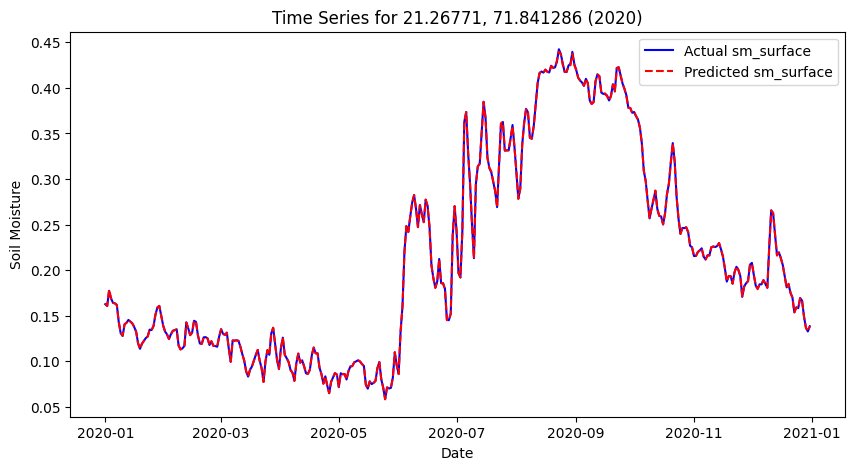

C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


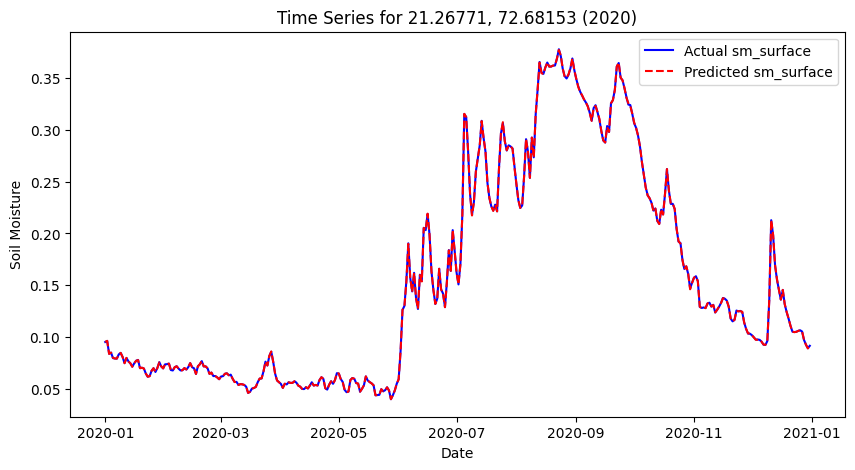

C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


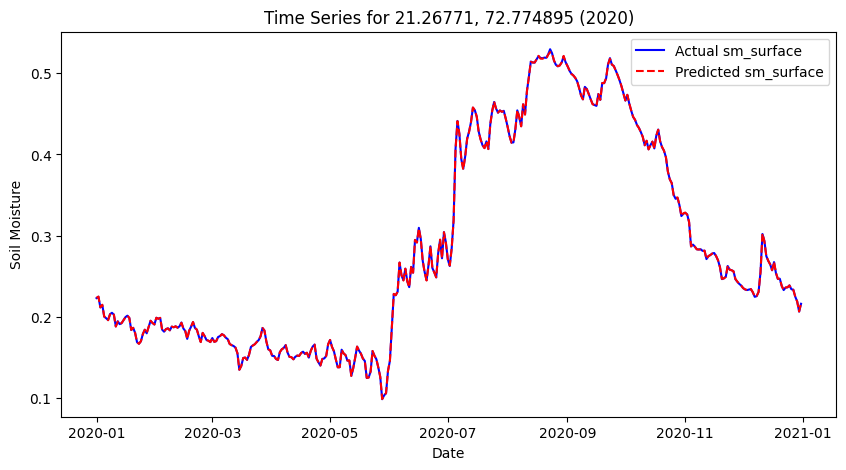

C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


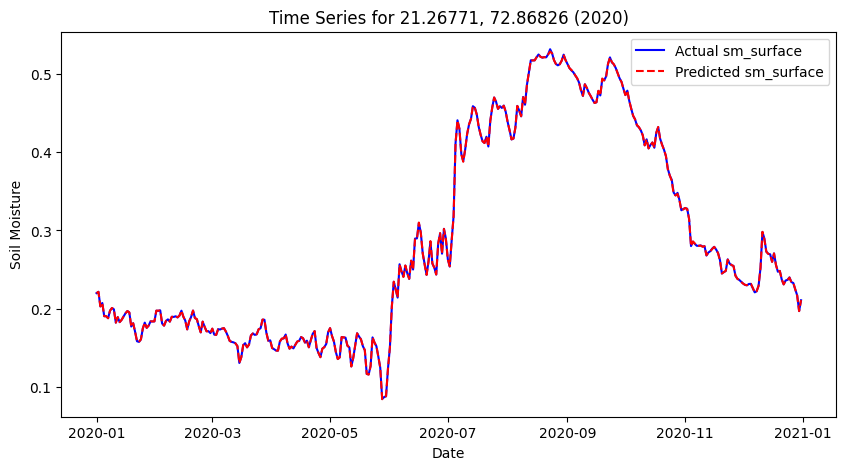

C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


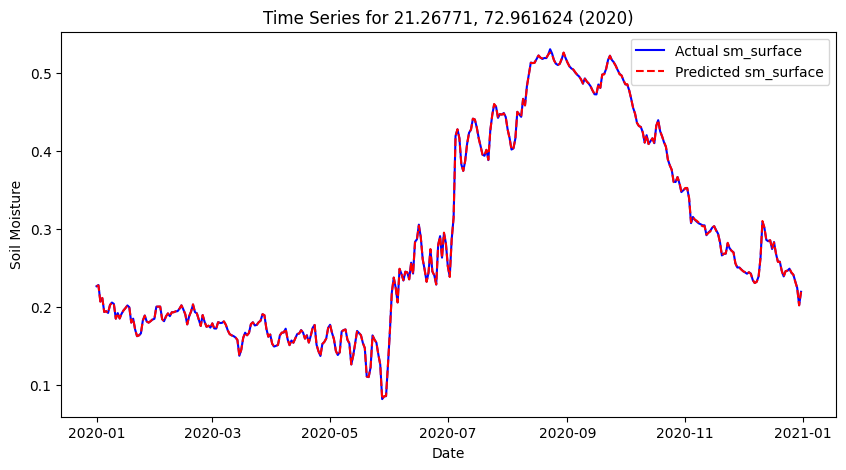

Evaluation complete. Results saved in 'evaluation_results.csv'


In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Load all CSV files
data_dir = "SMAP_Sample"  # Change this to actual folder path
all_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith(".csv")]

def extract_lat_lon(filename):
    """Extract latitude and longitude from filename."""
    parts = os.path.basename(filename).replace(".csv", "").split("_")
    return float(parts[1]), float(parts[2])

def evaluate_model(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    def cal_r2(obs, pre): return np.corrcoef(obs, pre)[0, 1]**2
    def cal_nse(obs, pre): return 1 - (np.sum((obs - pre)**2) / np.sum((obs - np.mean(obs))**2))
    def cal_kge(obs, pre):
        r = np.corrcoef(obs, pre)[0, 1]
        alpha = np.std(pre) / np.std(obs)
        beta = np.mean(pre) / np.mean(obs)
        return 1 - np.sqrt((r - 1) ** 2 + (alpha - 1) ** 2 + (beta - 1) ** 2)
    return {
        "R2": cal_r2(y_true, y_pred),
        "NSE": cal_nse(y_true, y_pred),
        "KGE": cal_kge(y_true, y_pred)
    }

# Store results
results_list = []

for file in all_files:
    lat, lon = extract_lat_lon(file)
    data = pd.read_csv(file)
    data.dropna(inplace=True)
    
    # Convert Date column from string (YYYYMMDD) to datetime format
    data["Date"] = pd.to_datetime(data["Date"], format="%Y%m%d")
    data["Year"] = data["Date"].dt.year
    data["Month"] = data["Date"].dt.month
    data["Day"] = data["Date"].dt.day
    
    # Ensure train_data and test_data are independent copies
    train_data = data[(data["Year"] >= 2016) & (data["Year"] <= 2019)].copy()
    test_data = data[data["Year"] == 2020].copy()
    
    features = ["Year", "Month", "Day", "Latitude", "Longitude", "sm_surface"]
    targets = ["sm_surface"]

    # Now modify safely
    train_data["Latitude"] = lat
    train_data["Longitude"] = lon
    test_data["Latitude"] = lat
    test_data["Longitude"] = lon
    
    X_train, y_train = train_data[features], train_data[targets]
    X_test, y_test = test_data[features], test_data[targets]
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_metrics = {target: evaluate_model(y_train[target], y_train_pred) for target in targets}
    test_metrics = {target: evaluate_model(y_test[target], y_test_pred) for target in targets}
    
    results_list.append({
        "Lat": lat, "Lon": lon,
        "Training R2": train_metrics["sm_surface"]["R2"], "Training NSE": train_metrics["sm_surface"]["NSE"], "Training KGE": train_metrics["sm_surface"]["KGE"],
        "Testing R2": test_metrics["sm_surface"]["R2"], "Testing NSE": test_metrics["sm_surface"]["NSE"], "Testing KGE": test_metrics["sm_surface"]["KGE"]
    })
    
    # Time series plot for testing period (2020)
    plt.figure(figsize=(10, 5))
    plt.plot(test_data["Date"], test_data["sm_surface"], label="Actual sm_surface", color='blue')
    plt.plot(test_data["Date"], y_test_pred, label="Predicted sm_surface", color='red', linestyle='dashed')
    # plt.plot(test_data["Date"], test_data["sm_rootzone"], label="Actual sm_rootzone", color='green')
    # plt.plot(test_data["Date"], y_test_pred[:, 1], label="Predicted sm_rootzone", color='orange', linestyle='dashed')
    plt.xlabel("Date")
    plt.ylabel("Soil Moisture")
    plt.title(f"Time Series for {lat}, {lon} (2020)")
    plt.legend()
    plt.show()

# Convert results list to DataFrame
results_df = pd.DataFrame(results_list)
results_df.to_csv("evaluation_results.csv", index=False)
print("Evaluation complete. Results saved in 'evaluation_results.csv'")


C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


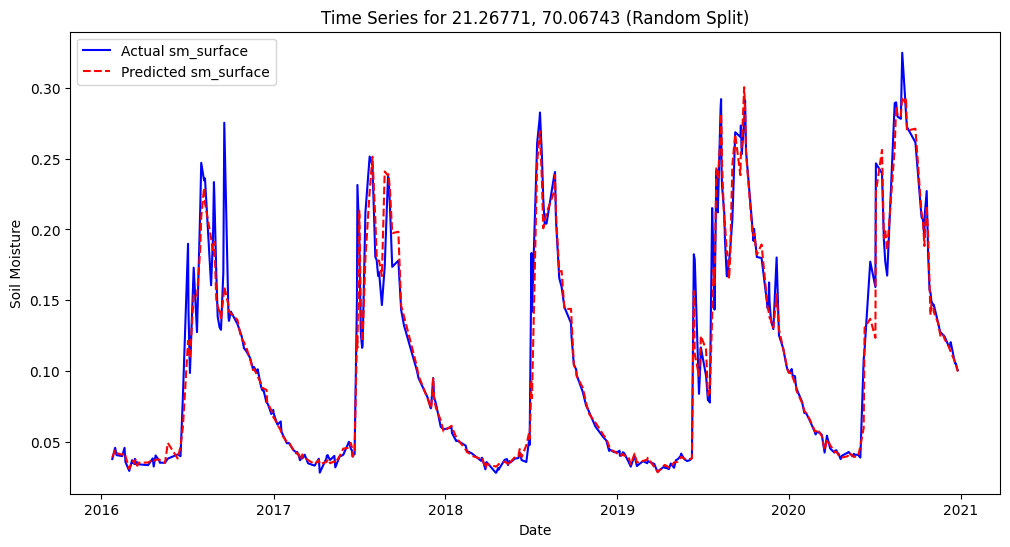

C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


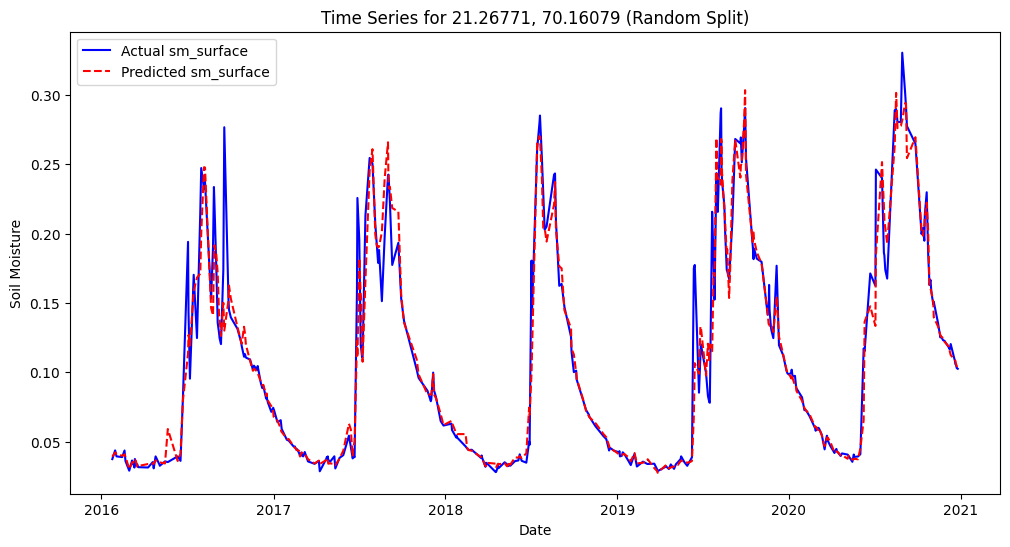

C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


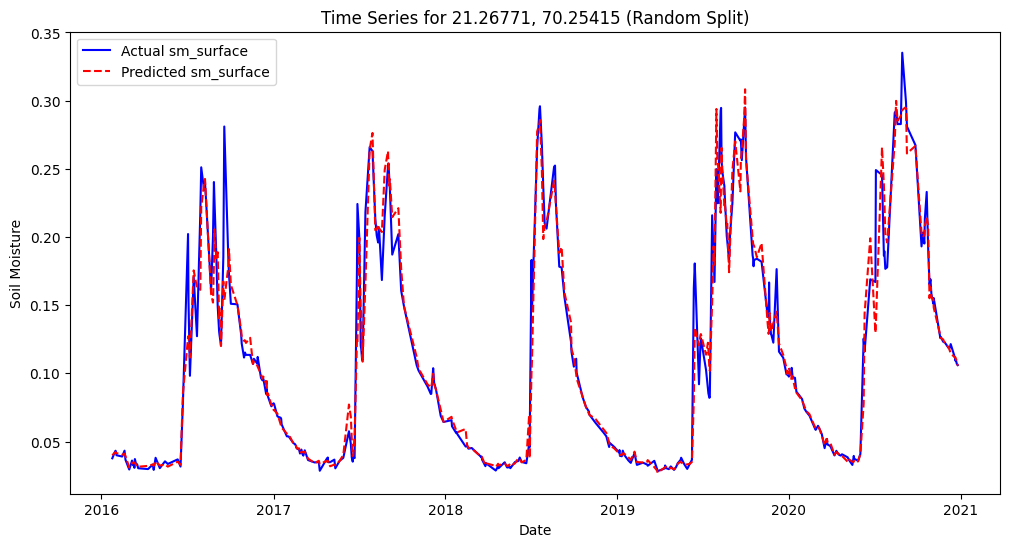

C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


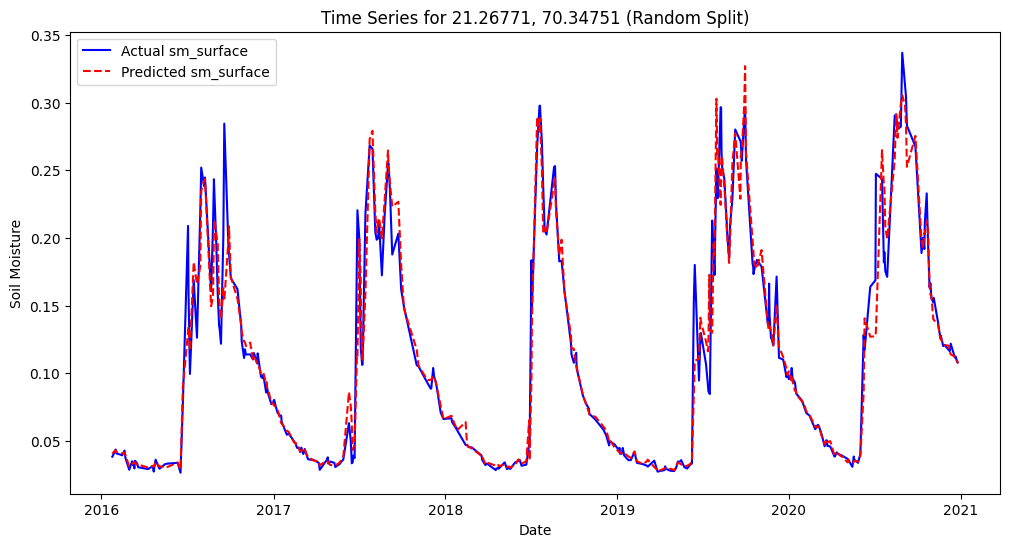

C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


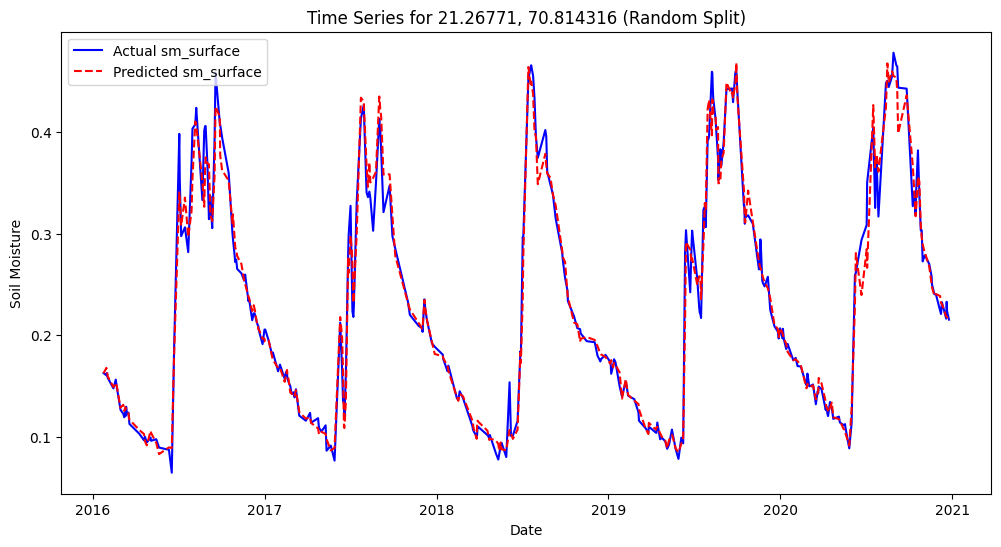

C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


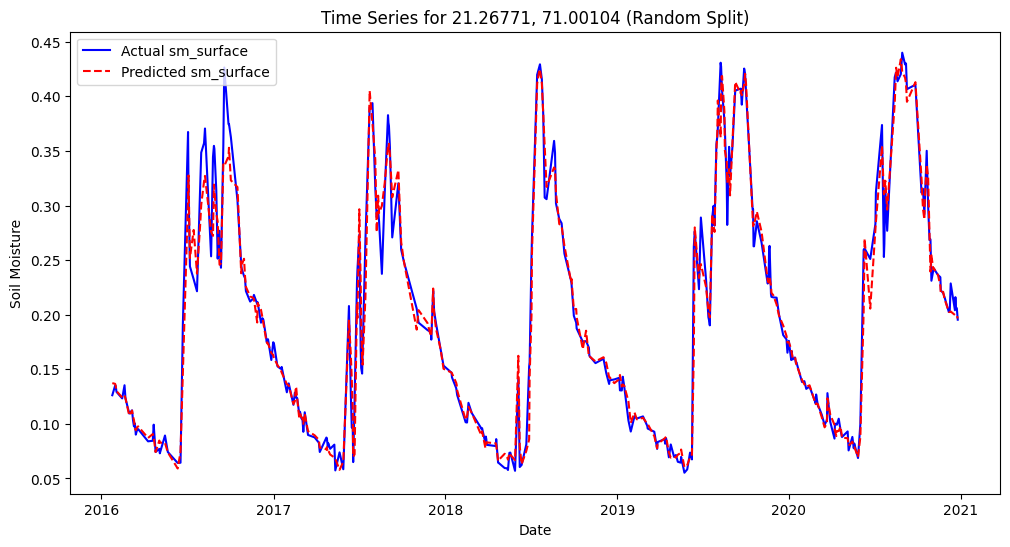

C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


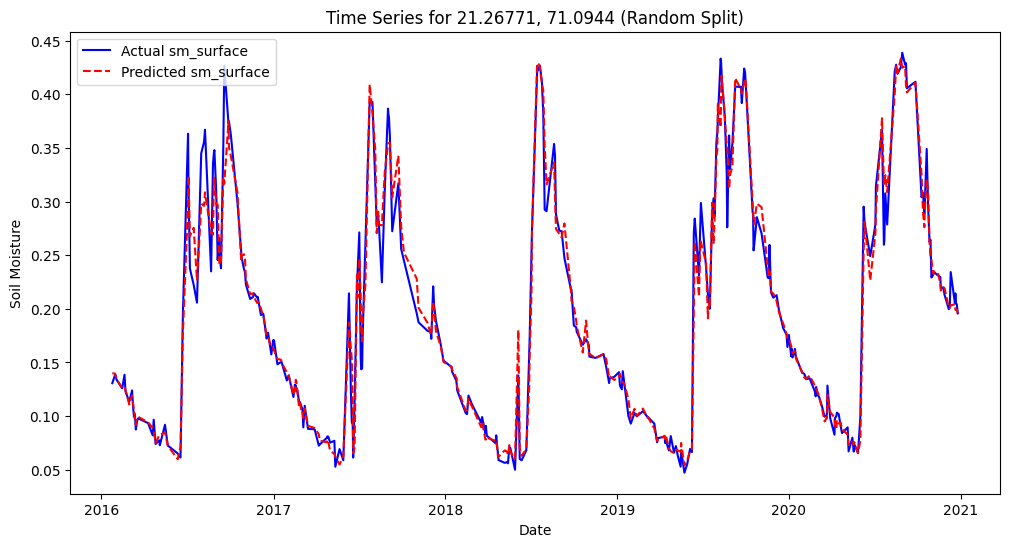

C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


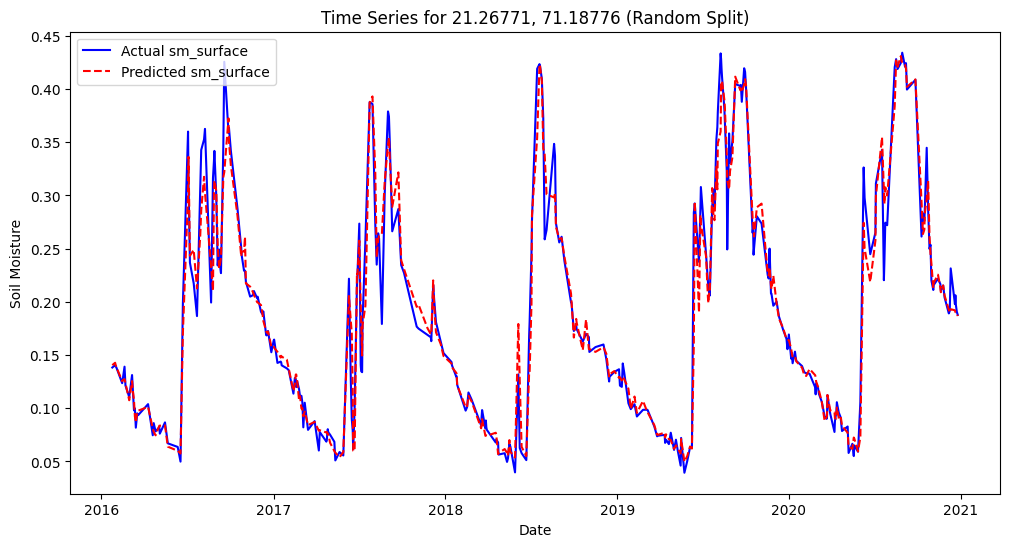

C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


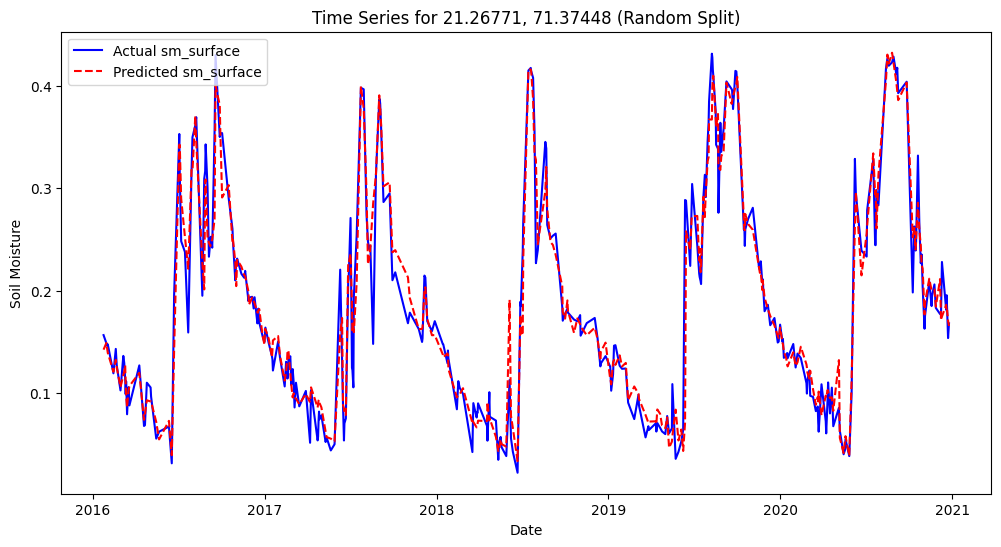

C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


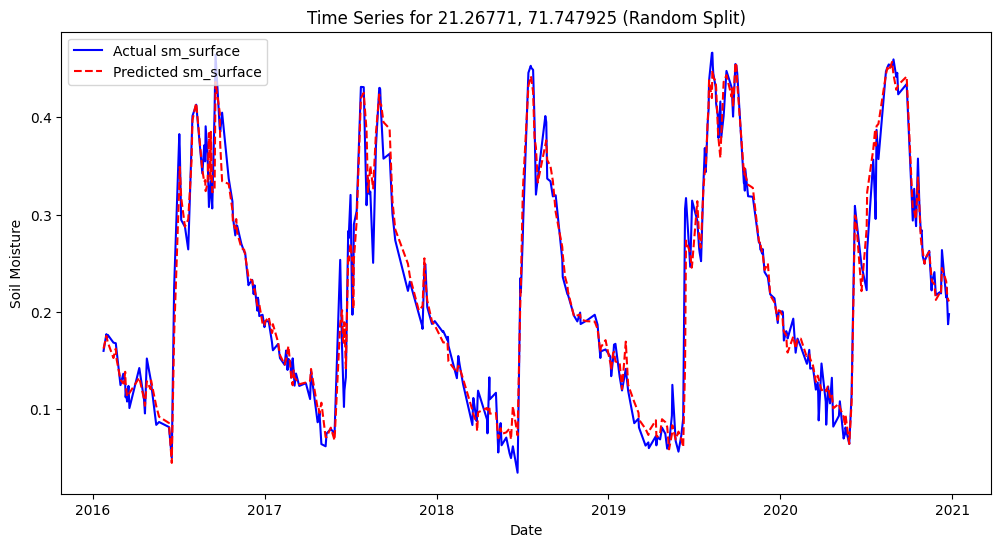

C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


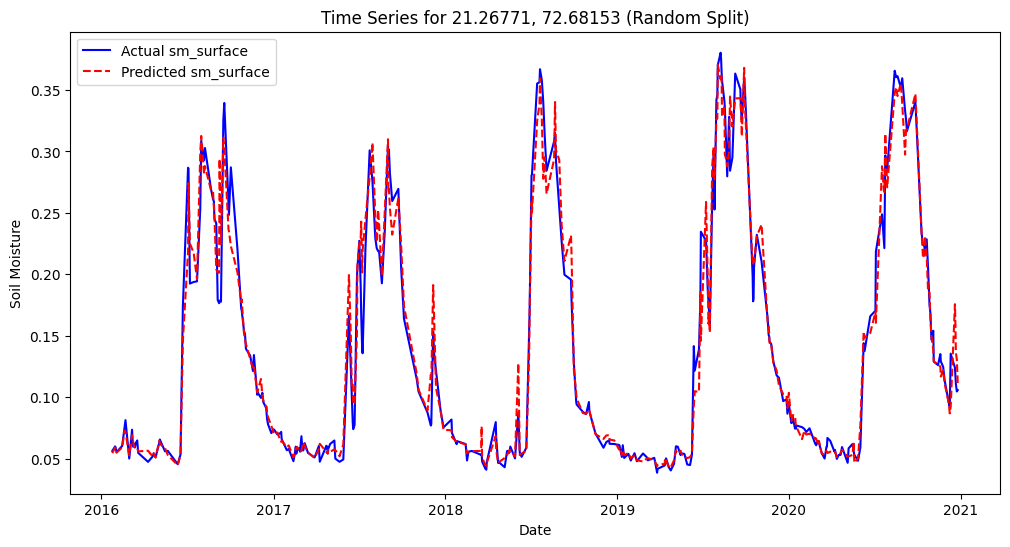

C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


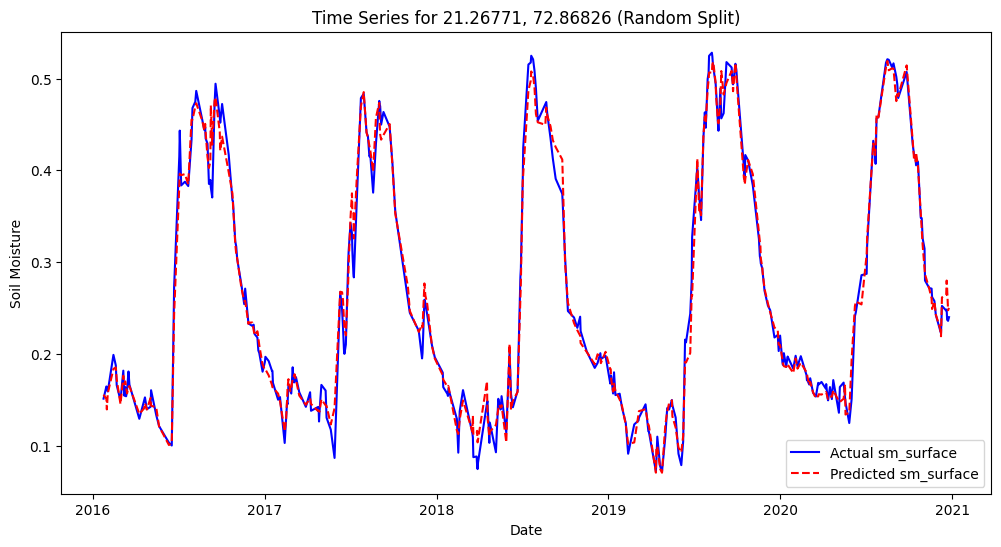

C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


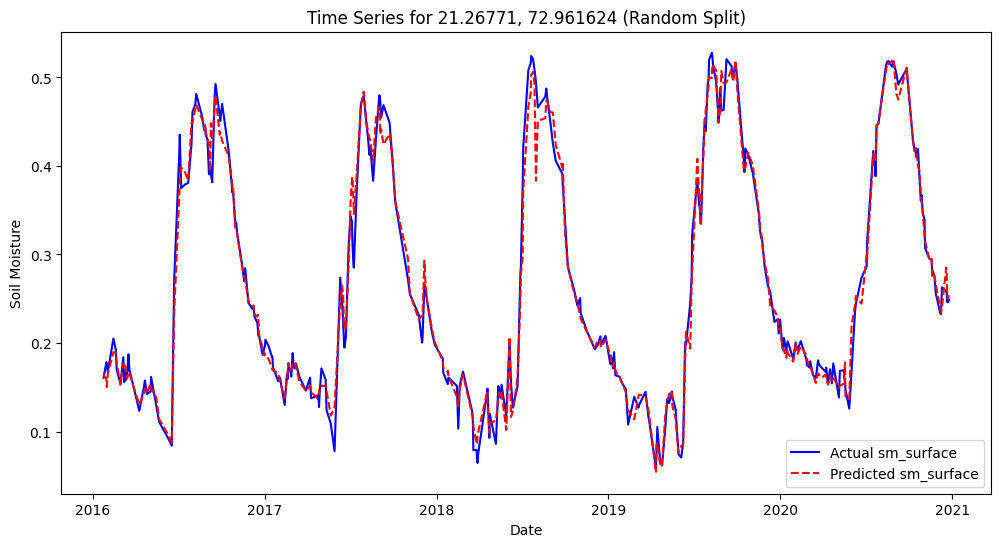

Evaluation complete. Results saved in 'evaluation_results_random_split.csv'


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load all CSV files
data_dir = "SMAP_Sample"  # Change this to the actual folder path
all_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith(".csv")]

import os

# Create the directory if it does not exist
os.makedirs("plots", exist_ok=True)


def extract_lat_lon(filename):
    """Extract latitude and longitude from filename."""
    parts = os.path.basename(filename).replace(".csv", "").split("_")
    return float(parts[1]), float(parts[2])

def evaluate_model(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    def cal_r2(obs, pre): return np.corrcoef(obs, pre)[0, 1]**2
    def cal_nse(obs, pre): return 1 - (np.sum((obs - pre)**2) / np.sum((obs - np.mean(obs))**2))
    def cal_kge(obs, pre):
        r = np.corrcoef(obs, pre)[0, 1]
        alpha = np.std(pre) / np.std(obs)
        beta = np.mean(pre) / np.mean(obs)
        return 1 - np.sqrt((r - 1) ** 2 + (alpha - 1) ** 2 + (beta - 1) ** 2)
    return {
        "R2": cal_r2(y_true, y_pred),
        "NSE": cal_nse(y_true, y_pred),
        "KGE": cal_kge(y_true, y_pred)
    }

# Store results
results_list = []

for file in all_files:
    lat, lon = extract_lat_lon(file)
    data = pd.read_csv(file)
    data.dropna(inplace=True)
    
    # Convert Date column from string (YYYYMMDD) to datetime format
    data["Date"] = pd.to_datetime(data["Date"], format="%Y%m%d")
    data["Year"] = data["Date"].dt.year
    data["Month"] = data["Date"].dt.month
    data["Day"] = data["Date"].dt.day
    
    features = ["Year", "Month", "Day", "Latitude", "Longitude","sm_surface_model"]
    targets = ["sm_surface"]
    
    data["Latitude"] = lat
    data["Longitude"] = lon
    
    # Random 80-20 split
    train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
    
    X_train, y_train = train_data[features], train_data[targets]
    X_test, y_test = test_data[features], test_data[targets]
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_metrics = {target: evaluate_model(y_train[target], y_train_pred) for target in targets}
    test_metrics = {target: evaluate_model(y_test[target], y_test_pred) for target in targets}
    
    results_list.append({
        "Lat": lat, "Lon": lon,
        "Training R2": train_metrics["sm_surface"]["R2"], "Training NSE": train_metrics["sm_surface"]["NSE"], "Training KGE": train_metrics["sm_surface"]["KGE"],
        "Testing R2": test_metrics["sm_surface"]["R2"], "Testing NSE": test_metrics["sm_surface"]["NSE"], "Testing KGE": test_metrics["sm_surface"]["KGE"]
    })
    
    # Ensure Date is in datetime format
    test_data["Date"] = pd.to_datetime(test_data["Date"])

    # Sort test data by Date
    sorted_indices = test_data["Date"].argsort()
    test_data = test_data.iloc[sorted_indices].reset_index(drop=True)
    y_test_pred = y_test_pred[sorted_indices]  # Align predictions

    # Time series plot
    plt.figure(figsize=(12, 6))
    plt.plot(test_data["Date"], test_data["sm_surface"], label="Actual sm_surface", color='blue')
    plt.plot(test_data["Date"], y_test_pred, label="Predicted sm_surface", color='red', linestyle='dashed')
    # plt.plot(test_data["Date"], test_data["sm_rootzone"], label="Actual sm_rootzone", color='green')
    # plt.plot(test_data["Date"], y_test_pred[:, 1], label="Predicted sm_rootzone", color='orange', linestyle='dashed')

    plt.xlabel("Date")
    plt.ylabel("Soil Moisture")
    plt.title(f"Time Series for {lat}, {lon} (Random Split)")
    plt.legend()
    plt.show()  

# Convert results list to DataFrame
results_df = pd.DataFrame(results_list)
results_df.to_csv("evaluation_results_random_split.csv", index=False)
print("Evaluation complete. Results saved in 'evaluation_results_random_split.csv'")


In [5]:
import os
import shutil
import re

# Function to extract lat and lon from filenames
def extract_lat_lon(filename):
    match = re.search(r"SMAP_([0-9.]+)_([0-9.]+).csv", filename)
    if match:
        return float(match.group(1)), float(match.group(2))
    return None, None

# Function to filter files based on latitude and longitude range
def filter_csv_files(input_folder, output_folder, lat_min, lat_max, lon_min, lon_max):
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # List all CSV files in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith(".csv"):
            lat, lon = extract_lat_lon(filename)
            
            # Check if file is within the specified lat-lon range
            if lat is not None and lon is not None:
                if lat_min <= lat <= lat_max and lon_min <= lon <= lon_max:
                    # Copy file to output folder
                    shutil.copy(os.path.join(input_folder, filename), os.path.join(output_folder, filename))

    print(f"Filtered files have been saved in: {output_folder}")

# Example usage
input_folder = "lalo_wise_reg"   # Update this with the actual folder path containing CSV files
output_folder = "filtered_csv_lalo_reg_files"    # Folder where filtered files will be stored

# Define the target region (latitude and longitude range)
lon_min, lon_max = 75.0, 85.0  
lat_min, lat_max = 20.0, 25.0  

# Run filtering function
filter_csv_files(input_folder, output_folder, lat_min, lat_max, lon_min, lon_max)


Filtered files have been saved in: filtered_csv_lalo_reg_files


In [15]:
import os
import pandas as pd
import glob
import re
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Function to extract lat and lon from filenames
def extract_lat_lon(filename):
    match = re.search(r"SMAP_([0-9.]+)_([0-9.]+).csv", filename)
    if match:
        return float(match.group(1)), float(match.group(2))
    return None, None

# Define the directory containing **filtered** CSV files
filtered_data_dir = "Filtered"  # Update path as needed
filtered_files = glob.glob(os.path.join(filtered_data_dir, "SMAP_*.csv"))

def nse_score(y_true, y_pred):
    """ Computes Nash-Sutcliffe Efficiency (NSE) Score. """
    return 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))

# Load and preprocess data
def load_data(files):
    df_list = []
    for file in files:
        df = pd.read_csv(file)
        lat, lon = extract_lat_lon(file)
        df['Latitude'] = lat
        df['Longitude'] = lon

        # Working date fix
        df['Date'] = pd.to_datetime(df['Date'].astype('int64').astype(str), format='%Y%m%d', errors='coerce')

        df_list.append(df)
    return pd.concat(df_list, ignore_index=True)

# Load filtered data
data = load_data(filtered_files)

# Extracting time-based features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['DayOfYear'] = data['Date'].dt.dayofyear
data.sort_values(by=['Date'], inplace=True)

# Loop over each test year and train on the remaining 4 years
years = data['Year'].unique()
results_rf_yearwise = []

for test_year in years:
    train_data = data[data['Year'] != test_year]
    test_data = data[data['Year'] == test_year]
    
    features = ['sm_surface_model', 'Latitude', 'Longitude', 'Year', 'Month', 'DayOfYear']
    target = 'sm_surface'
    
    X_train, y_train = train_data[features], train_data[target]
    X_test, y_test = test_data[features], test_data[target]
    
    # Train Random Forest
    rf = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
    rf.fit(X_train, y_train)
    
    # Predictions and NSE Score
    y_pred = rf.predict(X_test)
    nse = nse_score(y_test, y_pred)
    
    results_rf_yearwise.append({'Test Year': test_year, 'NSE': nse})
    print(f"Test Year: {test_year}, NSE: {nse}")

# Convert results to DataFrame and display
results_df = pd.DataFrame(results_rf_yearwise)
print(results_df)

Test Year: 2016, NSE: 0.7689935667095473
Test Year: 2017, NSE: 0.44123848876882377
Test Year: 2018, NSE: 0.7574866107197605
Test Year: 2019, NSE: 0.6287250944419512
Test Year: 2020, NSE: 0.6341332221761384
   Test Year       NSE
0       2016  0.768994
1       2017  0.441238
2       2018  0.757487
3       2019  0.628725
4       2020  0.634133


In [5]:
print(data['Date'].dt.year.value_counts().sort_index())
print(data['Date'].isna().sum())  # Should be 0
for f in filtered_files:
    df = pd.read_csv(f)
    if df.empty:
        print(f"Empty file: {f}")




Date
1970    12706785
Name: count, dtype: int64
0


In [8]:
print("Data shape:", data.shape)
print("Date NA count:", data['Date'].isna().sum())
print("Available years in data:", data['Date'].dt.year.unique())
print("Samples per year:")
print(data['Date'].dt.year.value_counts().sort_index())

# Optionally print one sample row
print("\nSample row:\n", data.head(1))


Data shape: (12706785, 10)
Date NA count: 0
Available years in data: [1970]
Samples per year:
Date
1970    12706785
Name: count, dtype: int64

Sample row:
                            Date  sm_surface  sm_rootzone  sm_surface_model  \
0 1970-01-01 00:00:00.020160101    0.190684     0.262785          0.103404   

   sm_rootzone_model  Latitude  Longitude  Year  Month  DayOfYear  
0           0.379733  20.06224  75.015564  1970      1          1  


In [12]:
# Ensure it's int (in case it's read as float)
data['Date'] = pd.to_datetime(data['Date'].astype('int64').astype(str), format='%Y%m%d', errors='coerce')

print(data['Date'].dt.year.value_counts().sort_index())



Date
2016    2545530
2017    2538575
2018    2538575
2019    2538575
2020    2545530
Name: count, dtype: int64


In [ ]:
# This is Random Forest for Random Split Testing
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def get_lat_lon_from_filename(filename):
    parts = filename.replace("SMAP_", "").replace(".csv", "").split("_")
    return float(parts[0]), float(parts[1])

def custom_random_split(dates, n_splits=5):
    """ Splits dates into 5 unique test sets ensuring each date appears once. """
    np.random.seed(42)  # For reproducibility
    shuffled_dates = np.random.permutation(dates)
    split_size = len(shuffled_dates) // n_splits
    test_sets = [set(shuffled_dates[i * split_size:(i + 1) * split_size]) for i in range(n_splits)]
    return test_sets

def train_random_forest(X_train, y_train, X_test, y_test):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    nse = 1 - (np.sum((y_test - predictions) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))
    return nse

# Directory containing data files
data_dir = "path_to_basin_data"

# Define the target region (latitude and longitude range)
lon_min, lon_max = 75.0, 85.0  
lat_min, lat_max = 20.0, 25.0  

results_rf_random_split = []

for file in os.listdir(data_dir):
    if file.endswith(".csv"):
        lat, lon = get_lat_lon_from_filename(file)
        if not (lat_min <= lat <= lat_max and lon_min <= lon <= lon_max):
            continue  # Skip files outside the region

        df = pd.read_csv(os.path.join(data_dir, file))
        df['Date'] = pd.to_datetime(df['Date'])
        unique_dates = df['Date'].unique()

        test_sets = custom_random_split(unique_dates)
        
        for i, test_dates in enumerate(test_sets):
            train_df = df[~df['Date'].isin(test_dates)]
            test_df = df[df['Date'].isin(test_dates)]

            X_train = train_df[['Lat', 'Lon', 'sm_surface_model']]
            y_train = train_df['sm_surface']
            X_test = test_df[['Lat', 'Lon', 'sm_surface_model']]
            y_test = test_df['sm_surface']

            nse_score = train_random_forest(X_train, y_train, X_test, y_test)
            results_rf_random_split.append([lat, lon, i + 1, nse_score])

# Convert results to a DataFrame
results_df_2 = pd.DataFrame(results_rf_random_split, columns=['Lat', 'Lon', 'Run', 'NSE Score'])
print(results_df_2)



In [7]:
import os
import pandas as pd
import glob
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping

# Extract lat/lon from filename
def extract_lat_lon(filename):
    match = re.search(r"SMAP_([-0-9.]+)_([-0-9.]+).csv", filename)
    if match:
        return float(match.group(1)), float(match.group(2))
    return None, None

# Nash–Sutcliffe efficiency
def nse_score(y_true, y_pred):
    return 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))

# Load and preprocess data
def load_data(files):
    df_list = []
    for file in files:
        df = pd.read_csv(file)
        lat, lon = extract_lat_lon(file)
        df['Latitude'] = lat
        df['Longitude'] = lon
        df['Date'] = pd.to_datetime(df['Date'].astype('int64').astype(str), format='%Y%m%d', errors='coerce')
        df_list.append(df)
    return pd.concat(df_list, ignore_index=True)

filtered_files = glob.glob("Filtered/SMAP_*.csv")
data = load_data(filtered_files)
data = data.dropna(subset=['Date', 'sm_surface', 'sm_surface_model'])


# Feature engineering
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['DayofYear'] = data['Date'].dt.dayofyear
data.sort_values(by='Date', inplace=True)

# Normalize only selected features (not Year!)
feature_cols = ['sm_surface_model', 'Latitude', 'Longitude', 'Year','Month','DayofYear']
scaler = MinMaxScaler()
data[feature_cols] = scaler.fit_transform(data[feature_cols])

# Normalize target separately
target_scaler = MinMaxScaler()
data[['sm_surface']] = target_scaler.fit_transform(data[['sm_surface']])

# Create sequences
def create_sequences(df, feature_cols, seq_len=7):
    sequences = []
    for i in range(len(df) - seq_len):
        seq = df[feature_cols].iloc[i:i+seq_len].values
        label = df['sm_surface'].iloc[i + seq_len]
        date = df['Date'].iloc[i + seq_len]
        sequences.append((seq, label, date))
    return sequences

# Year-wise LSTM training
data_1 = data.copy()
data_1['Year'] = data['Date'].dt.year
years = sorted(data_1['Year'].unique())

results = []

for test_year in years:
    print(f"\nTraining for Test Year: {int(str(test_year))}")
    train_data = data[data['Year'] != test_year]
    test_data = data[data['Year'] == test_year]

    train_seqs = create_sequences(train_data, feature_cols)
    test_seqs = create_sequences(test_data, feature_cols)

    if not train_seqs or not test_seqs:
        print(f"Skipping {test_year} due to insufficient data.")
        continue

    X_train, y_train, _ = zip(*train_seqs)
    X_test, y_test, test_dates = zip(*test_seqs)

    X_train, X_test = np.array(X_train), np.array(X_test)
    y_train, y_test = np.array(y_train), np.array(y_test)

    # Model
    model = Sequential()
    model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(16))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mse')
    early_stop = EarlyStopping(patience=5, restore_best_weights=True)
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, callbacks=[early_stop])

    # Predict and inverse scale
    y_pred = model.predict(X_test).flatten()
    y_pred_unscaled = target_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
    y_test_unscaled = target_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

    nse = nse_score(y_test_unscaled, y_pred_unscaled)
    results.append({'Test Year': int(test_year), 'NSE': round(nse, 4)})

    print(f"Test Year: {int(test_year)}, NSE: {nse:.4f}")

    # Plot predictions
    plt.figure(figsize=(12, 4))
    plt.plot(test_dates[:500], pd.Series(y_test_unscaled[:500]).rolling(7).mean(), label="Actual (Smoothed)", linewidth=2)
    plt.plot(test_dates[:500], pd.Series(y_pred_unscaled[:500]).rolling(7).mean(), label="Predicted (Smoothed)", linestyle="--")
    plt.title(f"LSTM: Actual vs Predicted for Test Year {int(test_year)}")
    plt.xlabel("Date")
    plt.ylabel("Soil Moisture (sm_surface)")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Final results
results_df = pd.DataFrame(results)
print("\nYear-wise NSE Scores:")
print(results_df)
print(f"\nAverage NSE: {results_df['NSE'].mean():.4f}")
print(f"Best NSE: {results_df['NSE'].max():.4f}")
print(f"Worst NSE: {results_df['NSE'].min():.4f}")



Training for Test Year: 2016


MemoryError: Unable to allocate 4.01 MiB for an array with shape (6, 87696) and data type float64

In [ ]:
#LSTM for Random Split Testing
import os
import pandas as pd
import glob
import re
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Function to extract lat-lon from filename
def extract_lat_lon(filename):
    match = re.search(r"SMAP_([0-9.]+)_([0-9.]+).csv", filename)
    if match:
        return float(match.group(1)), float(match.group(2))
    return None, None

# NSE Score Function
def nse_score(y_true, y_pred):
    return 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))

# Define the data directory
data_dir = "path_to_data_folder"
all_files = glob.glob(os.path.join(data_dir, "SMAP_*.csv"))

# Define the target region (latitude and longitude range)
lon_min, lon_max = 75.0, 85.0  
lat_min, lat_max = 20.0, 25.0  

# Filter files for the region
filtered_files = [f for f in all_files if lat_min <= extract_lat_lon(f)[0] <= lat_max and lon_min <= extract_lat_lon(f)[1] <= lon_max]

# Load Data
def load_data(files):
    df_list = []
    for file in files:
        df = pd.read_csv(file)
        lat, lon = extract_lat_lon(file)
        df['Latitude'] = lat
        df['Longitude'] = lon
        df_list.append(df)
    return pd.concat(df_list, ignore_index=True)

data = load_data(filtered_files)
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by=['Date'], inplace=True)

# Normalize data
scaler = MinMaxScaler()
data[['sm_surface_model', 'Latitude', 'Longitude']] = scaler.fit_transform(data[['sm_surface_model', 'Latitude', 'Longitude']])

# Convert data to LSTM format
def create_sequences(df, seq_length=10):
    sequences = []
    for i in range(len(df) - seq_length):
        seq = df.iloc[i:i+seq_length].values
        label = df.iloc[i+seq_length]['sm_surface']
        sequences.append((seq, label))
    return sequences

# Ensure each date appears once in test set over 5 runs
unique_dates = data['Date'].unique()
np.random.seed(42)
shuffled_dates = np.random.permutation(unique_dates)
split_size = len(shuffled_dates) // 5
test_sets = [set(shuffled_dates[i * split_size:(i + 1) * split_size]) for i in range(5)]

results_lstm_random_split = []

for i, test_dates in enumerate(test_sets):
    train_data = data[~data['Date'].isin(test_dates)]
    test_data = data[data['Date'].isin(test_dates)]

    features = ['sm_surface_model', 'Latitude', 'Longitude']
    
    train_sequences = create_sequences(train_data[features])
    test_sequences = create_sequences(test_data[features])
    
    X_train, y_train = zip(*train_sequences)
    X_test, y_test = zip(*test_sequences)
    
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_test, y_test = np.array(X_test), np.array(y_test)

    # Define LSTM Model
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
        Dense(1)
    ])
    
    model.compile(optimizer='adam', loss='mse')
    
    # Train Model
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Compute NSE Score
    nse = nse_score(y_test, y_pred.flatten())
    results_lstm_random_split.append({'Run': i + 1, 'NSE': nse})
    
    print(f"Run {i+1}, NSE: {nse}")

# Convert results to DataFrame
results_df_4 = pd.DataFrame(results_lstm_random_split)
print(results_df_4)


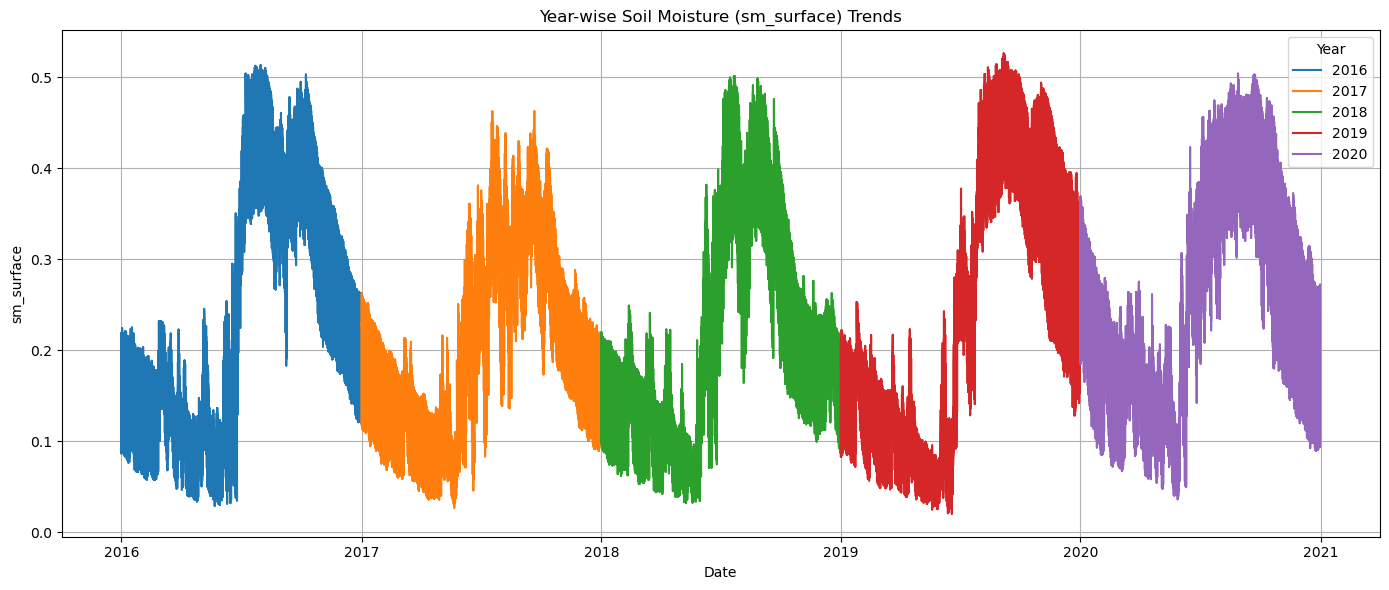

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from glob import glob

# Path to your folder with CSV files
folder_path = "Filtered"  # ⬅️ Replace this with your actual folder path

# Get list of all CSV files in the folder
csv_files = sorted(glob(os.path.join(folder_path, "*.csv")))

# Read and combine all CSVs into a single DataFrame
all_data = []
for file in csv_files:
    df = pd.read_csv(file)
    all_data.append(df)

data = pd.concat(all_data, ignore_index=True)

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')
data['Year'] = data['Date'].dt.year

# Sort data
data.sort_values('Date', inplace=True)

# Plotting sm_surface line plots for each year
years = sorted(data['Year'].unique())

plt.figure(figsize=(14, 6))
for year in years:
    yearly_data = data[data['Year'] == year]
    plt.plot(yearly_data['Date'], yearly_data['sm_surface'], label=str(year))

plt.title("Year-wise Soil Moisture (sm_surface) Trends")
plt.xlabel("Date")
plt.ylabel("sm_surface")
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()
